#  <p style="color:Black;">1.Importing DS. </p>

In [1]:
import numpy as np 
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix,f1_score, roc_curve, roc_auc_score
from sklearn import metrics
import tensorflow as tf
from sklearn.impute import KNNImputer

warnings.filterwarnings("ignore")

[](https://www.google.com/imgres?imgurl=https%3A%2F%2Fcdn-prod.medicalnewstoday.com%2Fcontent%2Fimages%2Farticles%2F323%2F323627%2Fdiabetes.jpg&imgrefurl=https%3A%2F%2Fwww.medicalnewstoday.com%2Farticles%2F323627&tbnid=8Uh9XWHpI-PPHM&vet=12ahUKEwi3k7u7ppHwAhXnDLcAHYrgCNIQMygAegUIARDQAQ..i&docid=F90ufqoDOf6rXM&w=1100&h=734&q=diabetes&ved=2ahUKEwi3k7u7ppHwAhXnDLcAHYrgCNIQMygAegUIARDQAQ)

#  <p style="color:Black;">2. Reading The Dataset and Creating DataFrame. </p>

In [2]:

diabetes = pd.read_csv('./pima-indians-diabetes.csv')


#  <p style="color:Black;">3. Data Analysis </p>

**3.1 Examinning data**

In [3]:
diabetes.head(10)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   
5            5      116             74              0        0  25.6   
6            3       78             50             32       88  31.0   
7           10      115              0              0        0  35.3   
8            2      197             70             45      543  30.5   
9            8      125             96              0        0   0.0   

   DiabetespedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
5                     0.201   30        0  
6                     0.248   26        1  
7                     0.134   29        0  
8                     0.158   53        1  
9                     0.232   54        1

**3.2 Number Of Rows and Columns In DataFrame**

In [4]:
print(f"Number of rows in dataframe are : {diabetes.shape[0]} \nNumber of columns in dataframe are : {diabetes.shape[1]} \n")

Number of rows in dataframe are : 768 
Number of columns in dataframe are : 9 



**3.3 Examine DF**

In [5]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetespedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


> * 7 columns of type "int".
> * 2 columns of type "float"

**3.4 Checking Statistical info of data**

In [6]:
diabetes.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetespedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

**3.5 Checking The Duplicate Rows**

In [7]:
diabetes[diabetes.duplicated()]

Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetespedigreeFunction, Age, Outcome]
Index: []

> **0** duplicate rows found in the dataframe.

**3.6 Inspect unique values in data**

In [8]:
diabetes.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetespedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

> * Highest number of unique values are in column DiabetesPedigreeFunction.

**3.7 Checking For The Null Values in DataFrame**

In [9]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetespedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

> **0** null values found

**3.8 Checking Class Distribution**

In [10]:
print("Number of samples for Outcome 0 are : ",len(diabetes[diabetes['Outcome']==0]))
print("Number of samples for Outcome 1 are : ",len(diabetes[diabetes['Outcome']==1]))


Number of samples for Outcome 0 are :  500
Number of samples for Outcome 1 are :  268


> Classes are **imbalanced**.This may end up in iased data


#  <p style="color:Blue;">4. Data Visualization</p>

In [11]:
# Add all column names to a list except for the target variable
columns=diabetes.columns
columns=list(columns)
columns.pop()
print("Column names except for the target column are :",columns)

#Graphs to be plotted with these colors
colours=['b','c','g','k','m','r','y','b']
print()
print('Colors for the graphs are :',colours)

Column names except for the target column are : ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetespedigreeFunction', 'Age']

Colors for the graphs are : ['b', 'c', 'g', 'k', 'm', 'r', 'y', 'b']


**4.1 Distplot For Various Features**

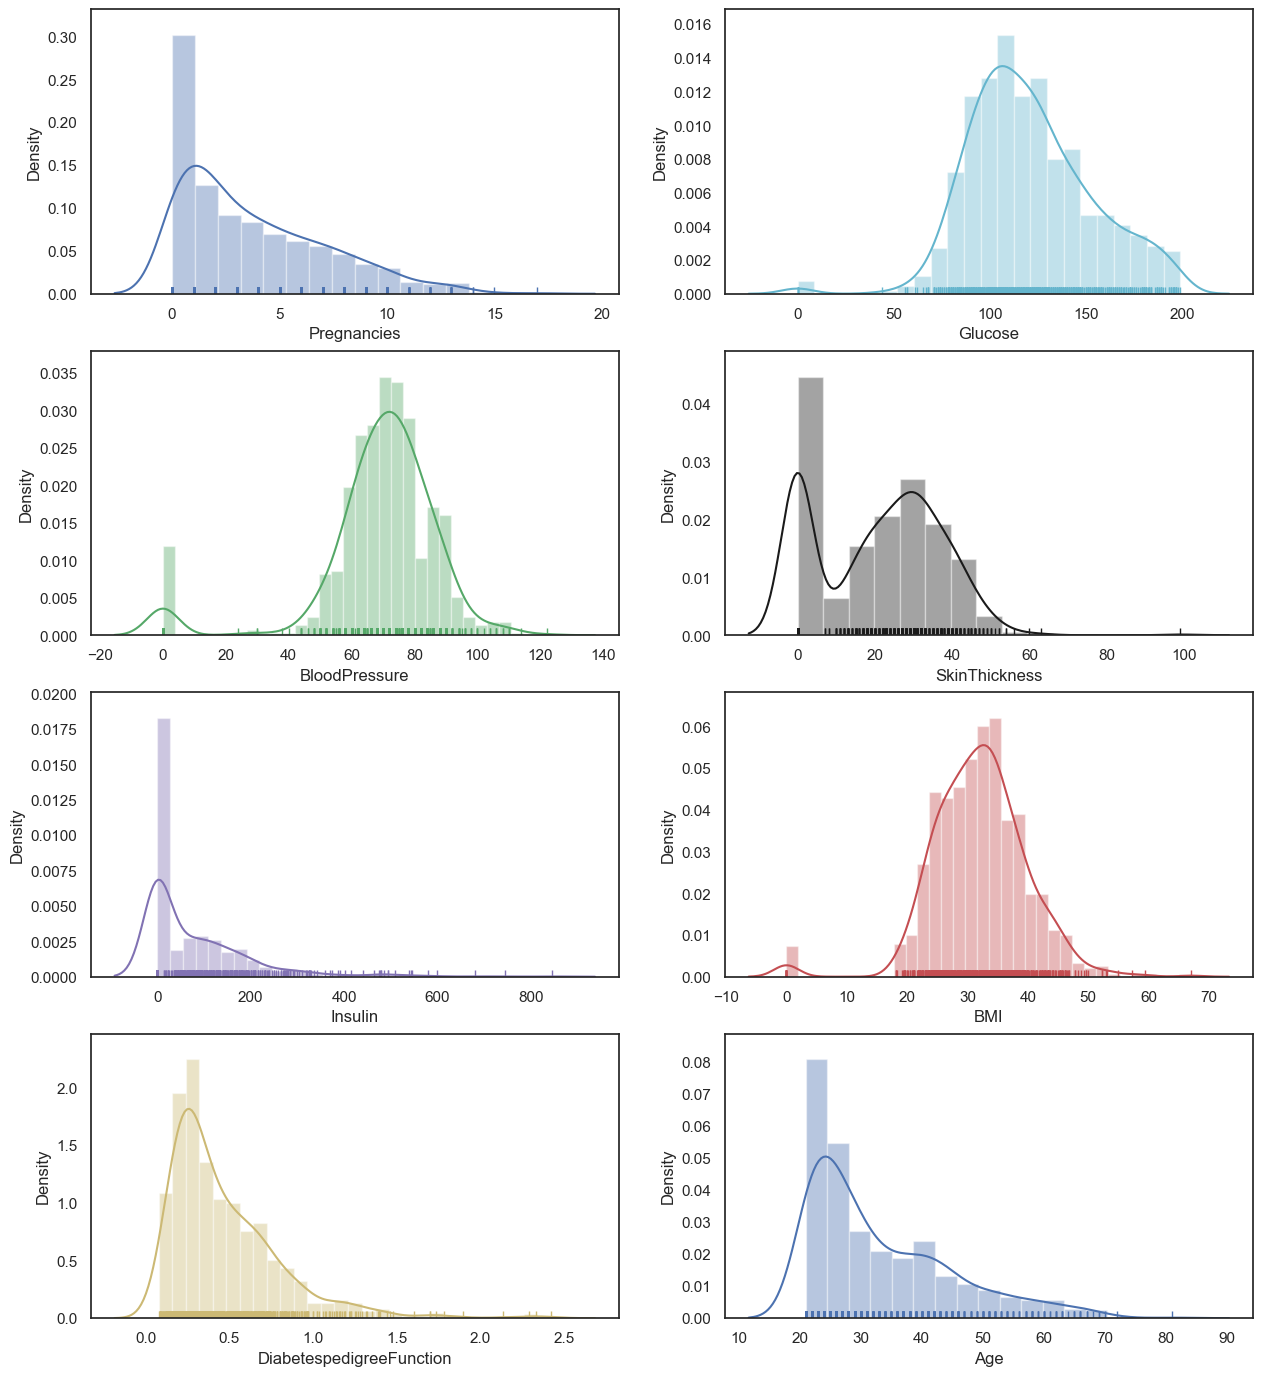

In [12]:
sns.set(rc={'figure.figsize':(15,17)})
sns.set_style(style='white')
for i in range(len(columns)):
    
    plt.subplot(4,2,i+1)
    sns.distplot(diabetes[columns[i]], hist=True, rug=True, color=colours[i])

None of the graphs here are following a normal distribution.

**4.2 ViolinPlot For Outcome Vs. Other Attributes**

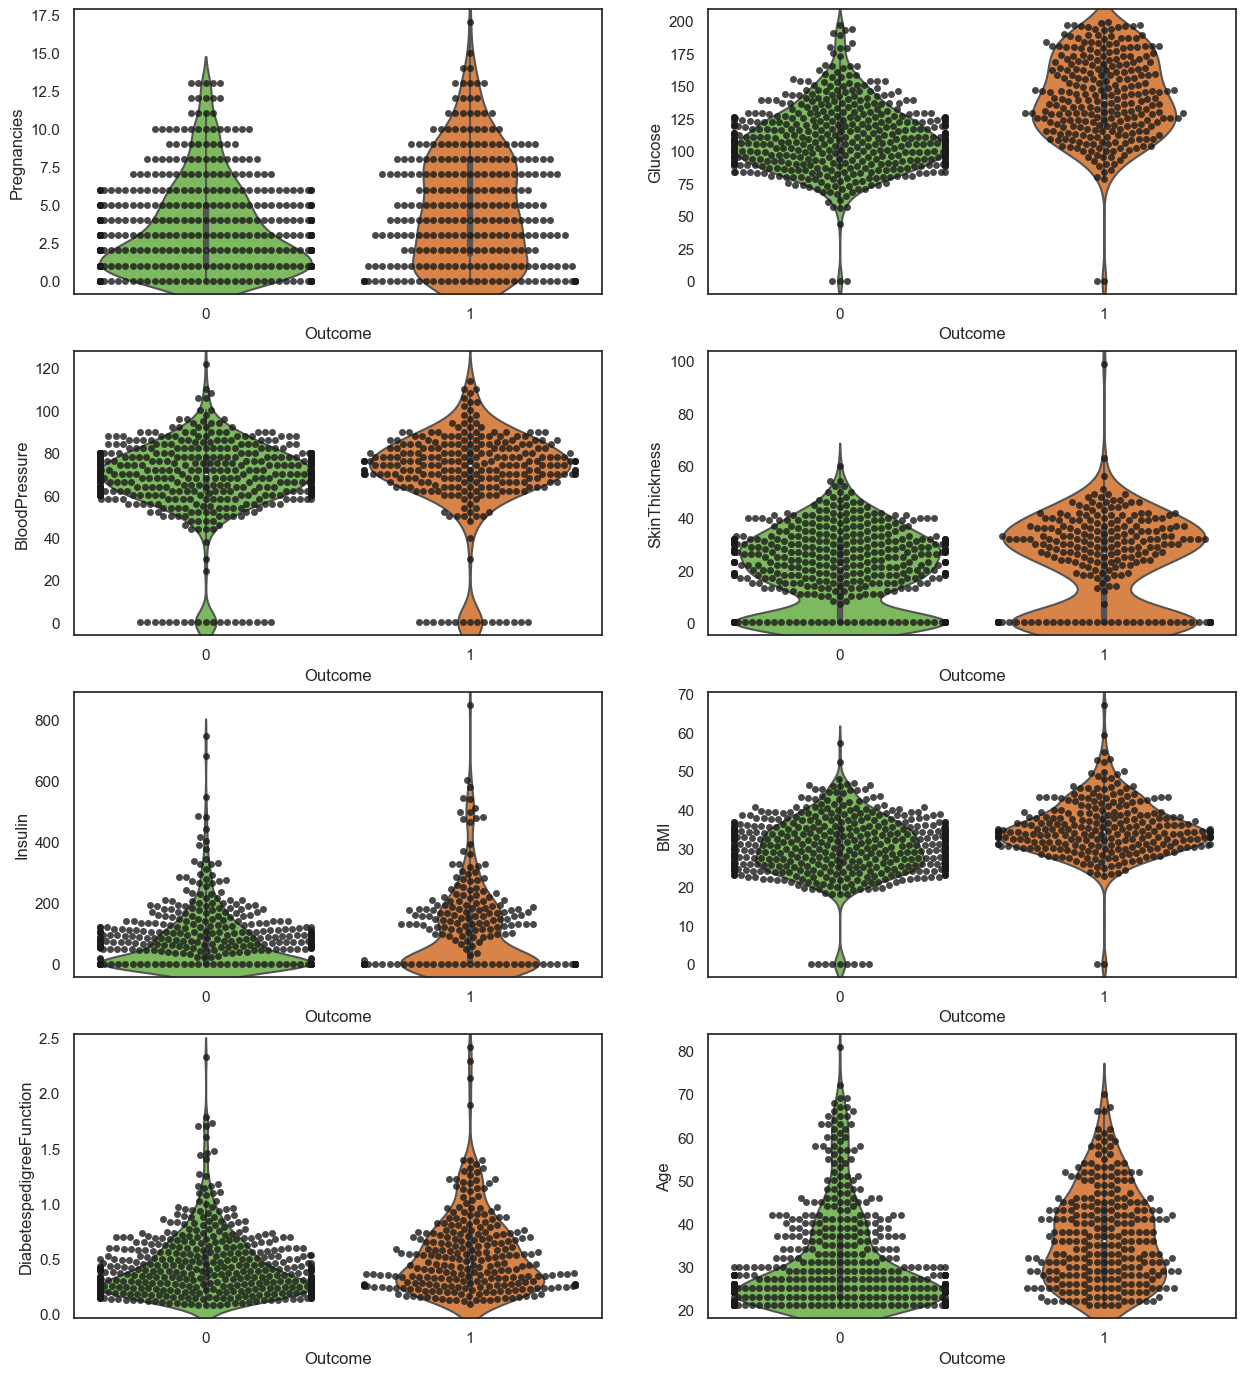

In [13]:
sns.set(rc={'figure.figsize':(15,17)})
colors_list = ['#78C850', '#F08030']
j=1
sns.set_style(style='white')

for i in (columns):
    plt.subplot(4,2,j)
    sns.violinplot(x="Outcome", y=i,data=diabetes, kind="violin", split=True, height=4, aspect=.7,palette=colors_list)       
    sns.swarmplot(x='Outcome', y=i,data=diabetes, color="k", alpha=0.8)  
    j=j+1


**4.3 ScatterPlot Of All Attributes Against Each Other**

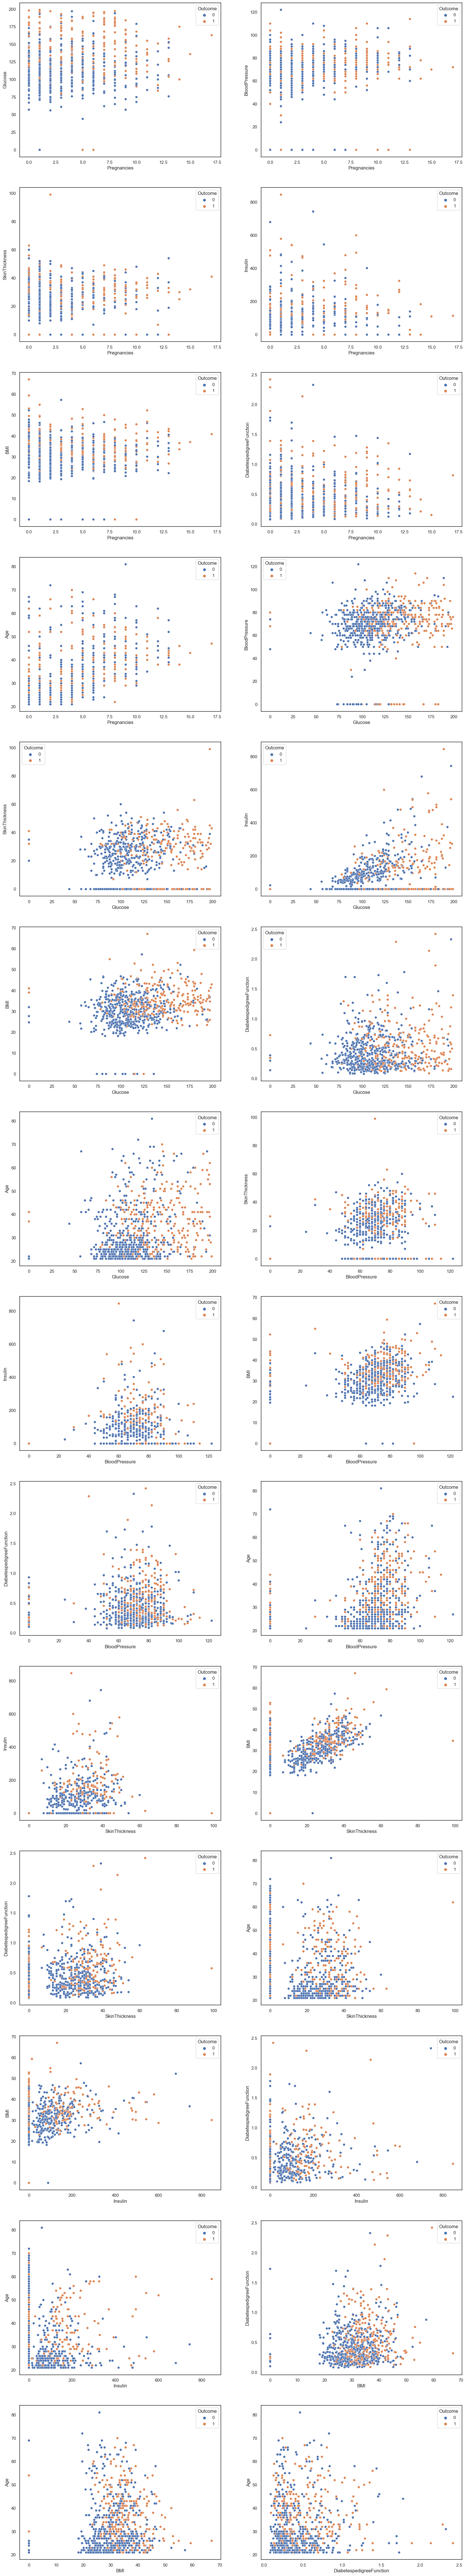

In [14]:
sns.set(rc={'figure.figsize':(20,150)})
j=1

sns.set_style(style='white')
for i in range(len(columns)):
    for k in range(i,len(columns)):
        try:
            if i==k:
                continue
            plt.subplot(18,2,j)
            sns.scatterplot(x=diabetes[columns[i]],y=diabetes[columns[k]],hue="Outcome",data=diabetes)
            j=j+1
        except:
            break

**4.4 Strip Plot Distribution Of Attributes Vs Outcome**

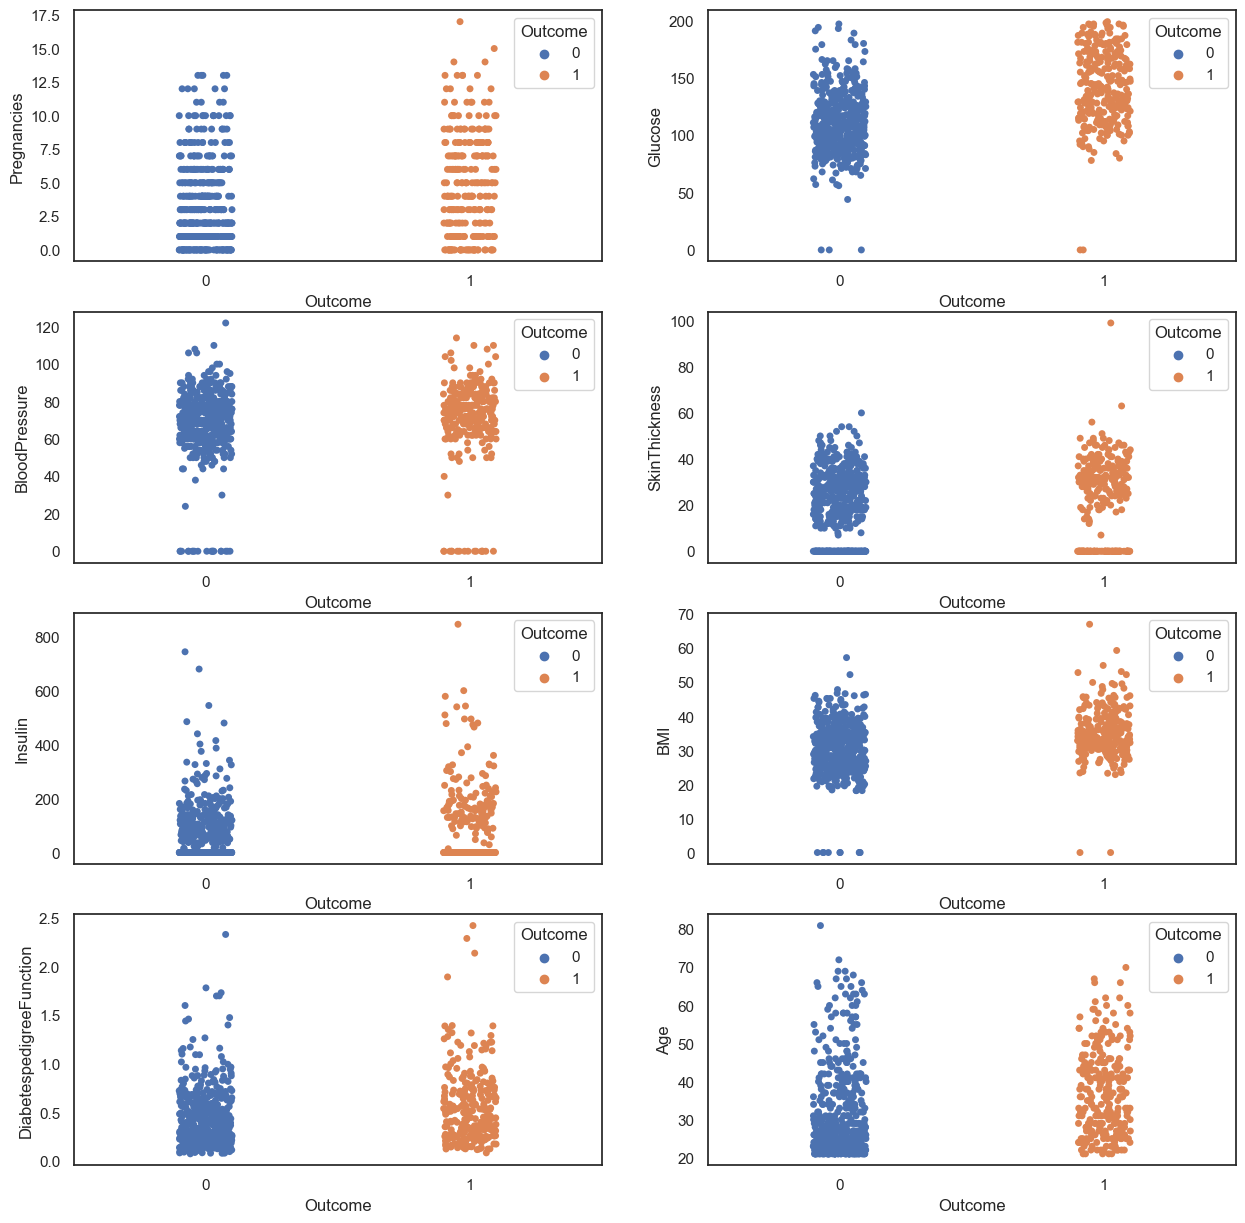

In [15]:
sns.set(rc={'figure.figsize':(15,15)})
j=1
sns.set_style(style='white')
for i in range(len(columns)):
    plt.subplot(4,2,j)
    sns.stripplot(x='Outcome', y=columns[i] , data=diabetes,hue="Outcome")
    j=j+1   


**4.5 Plotting The Pair Plot**

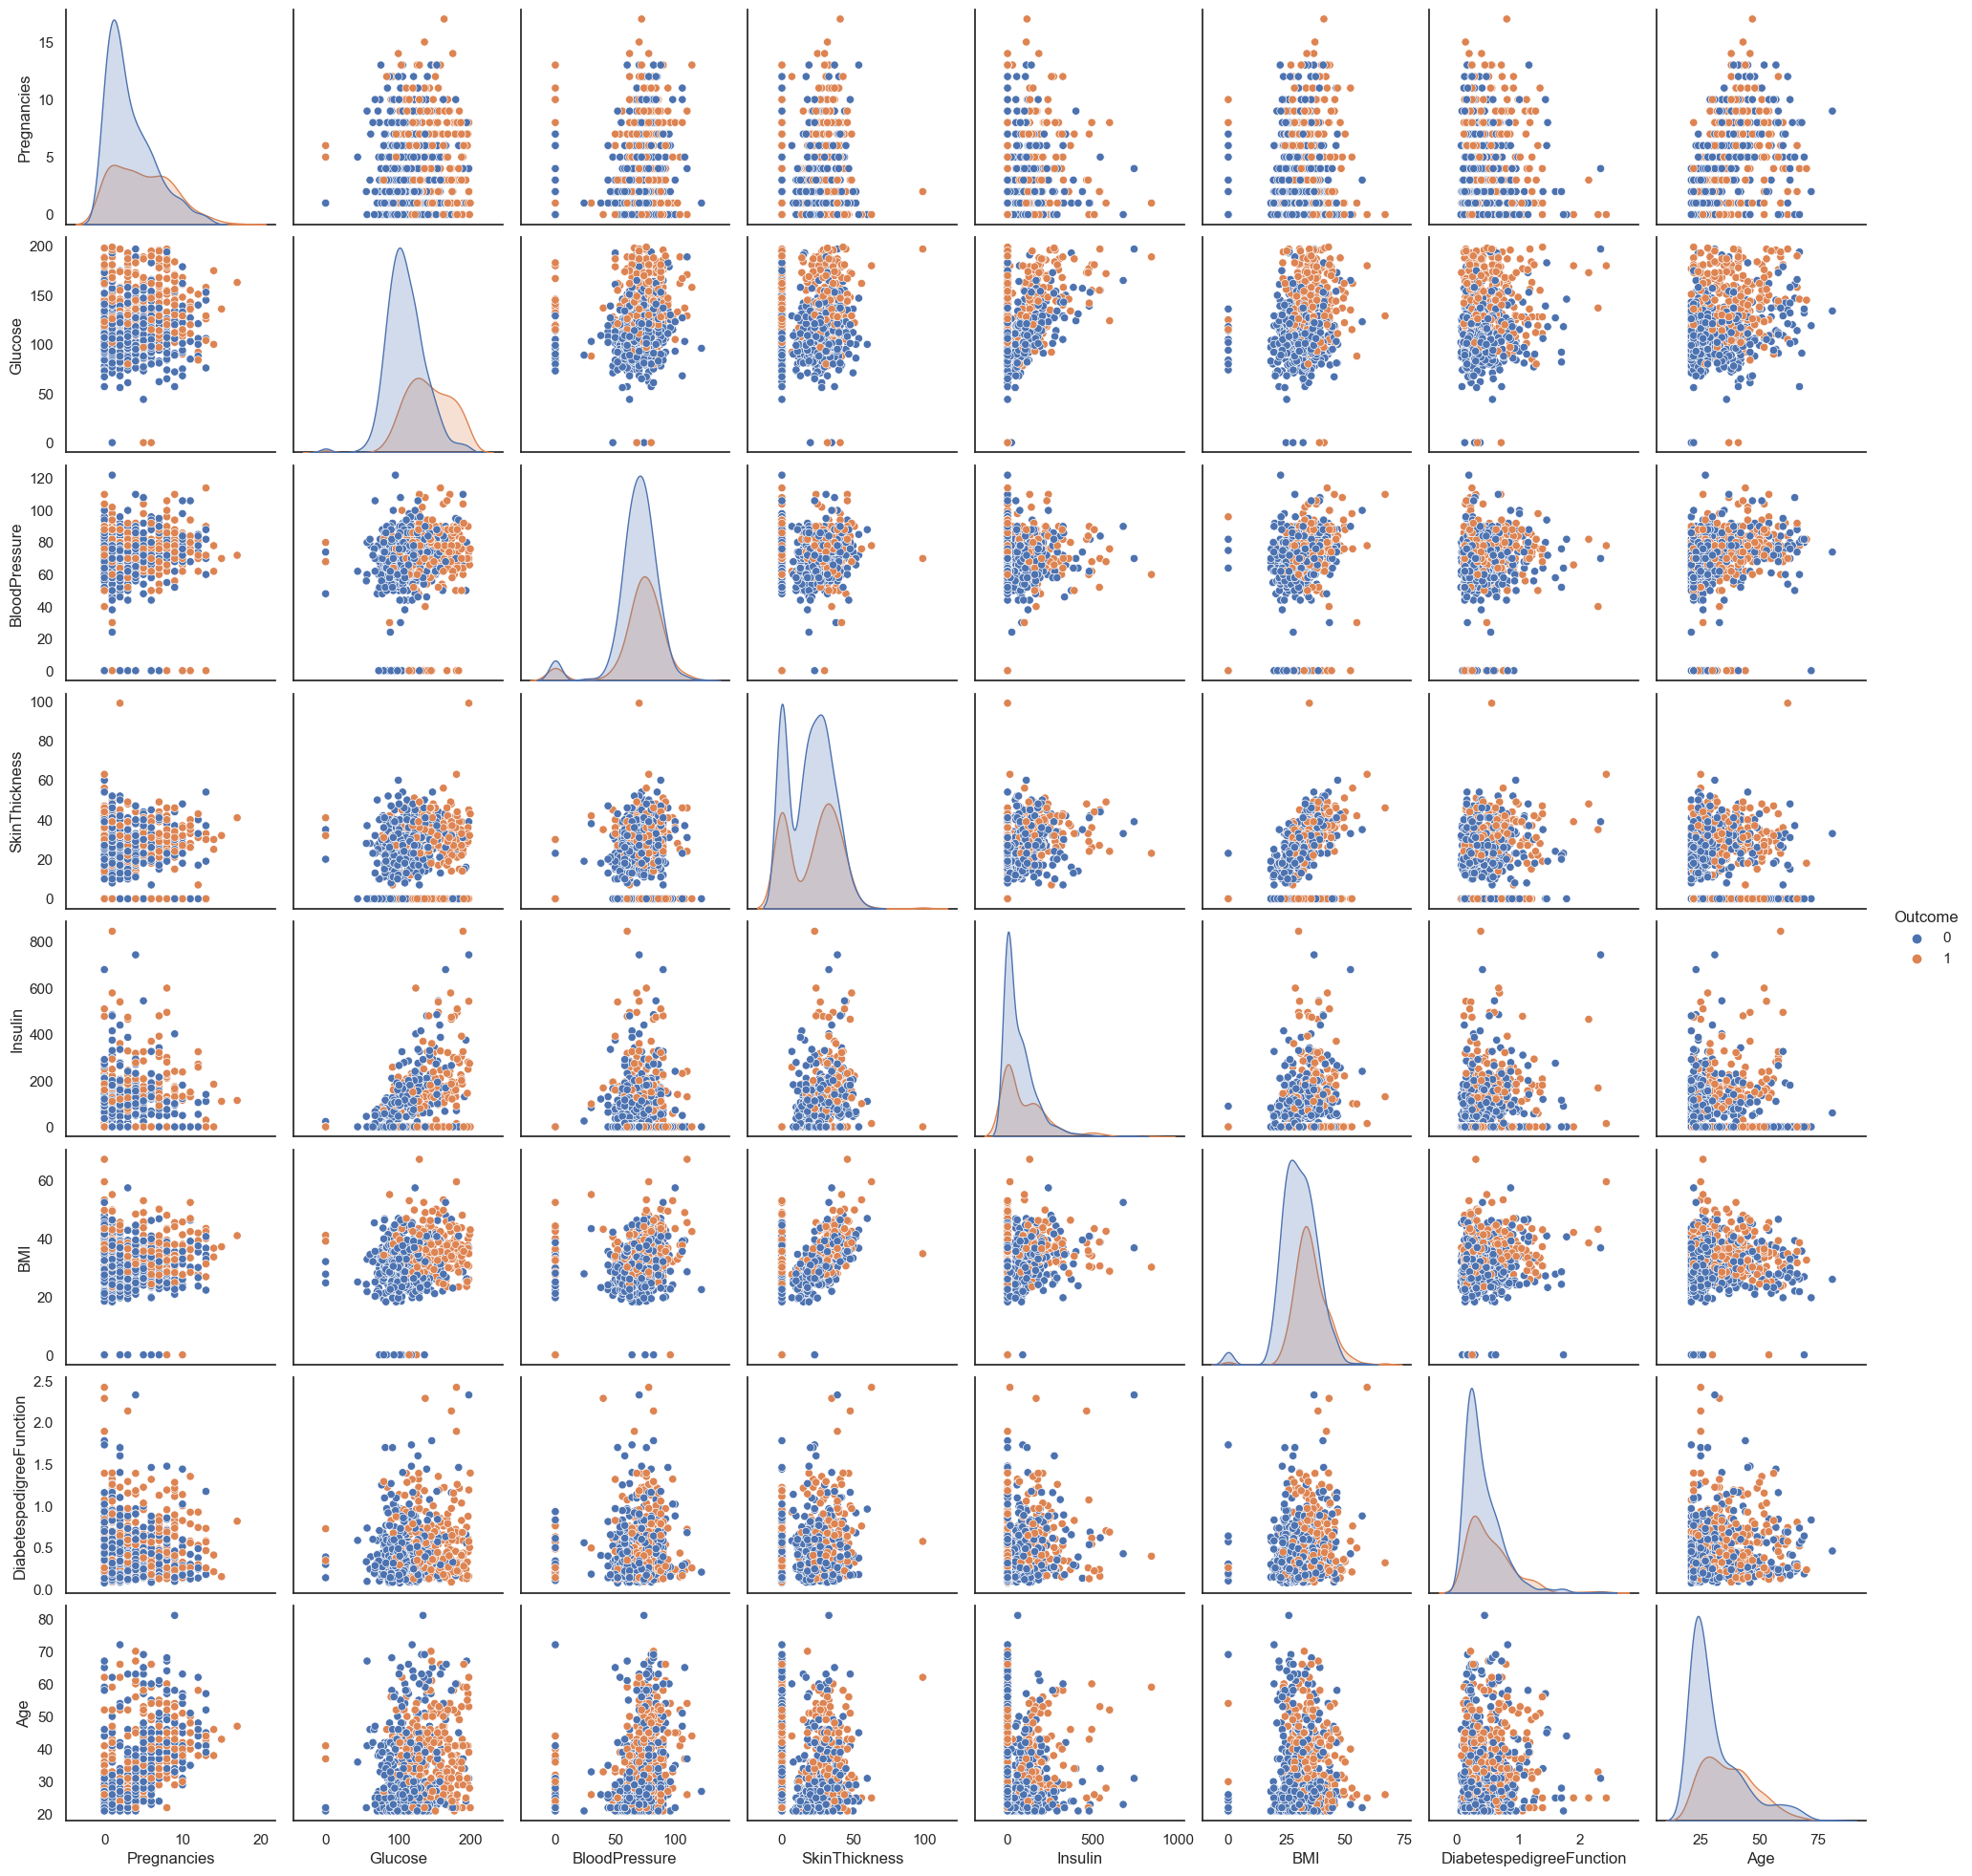

In [16]:
sns.set(rc={'figure.figsize':(30,250)})
sns.set_style(style='white')
sns.pairplot(diabetes, hue='Outcome')

**4.6 HeatMap**

<Axes: >

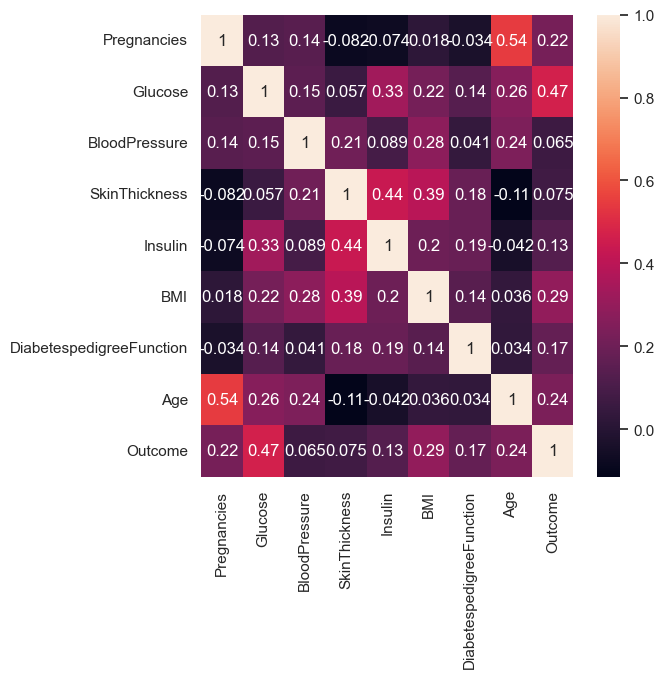

In [17]:
plt.figure(figsize=(6,6))
sns.light_palette("seagreen", as_cmap=True)
sns.heatmap(diabetes.corr(), annot=True)

**4.7 Distribution Of Target Variable**

<Axes: xlabel='Outcome', ylabel='count'>

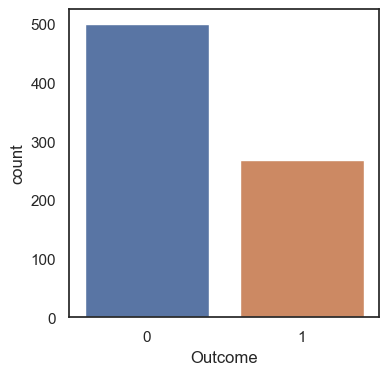

In [18]:
plt.figure(figsize=(4,4))
sns.set_style(style='white')
sns.countplot(diabetes,x= 'Outcome')

### 4.8 KDEplot

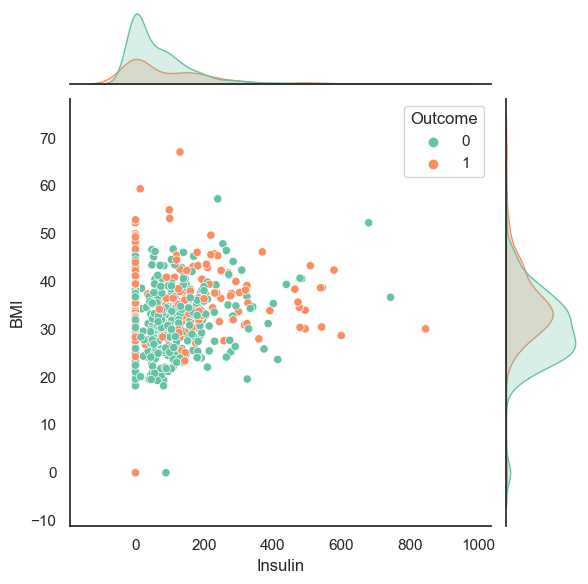

In [19]:
with sns.axes_style("white"):
    sns.set_palette("Set2")
    g2 = sns.jointplot(data=diabetes,x="Insulin", y="BMI",hue="Outcome")


#  <p style="color:Blue;">5. Data PreProcessing</p>

**5.1 Feature Engineering**

In [20]:
diabetes_with_preprocessing = diabetes

<Axes: >

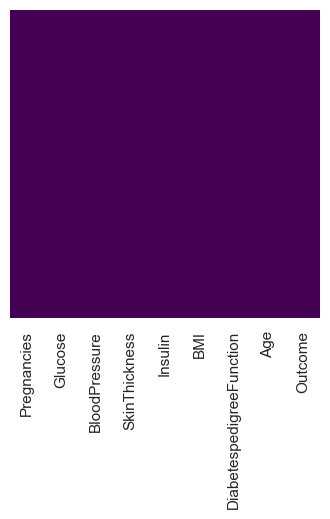

In [21]:
plt.figure(figsize=(4,4))

sns.heatmap(diabetes_with_preprocessing.isnull(),yticklabels=False,cbar=False, cmap="viridis")

In [22]:
#identify the numeric columns for skewness and kurtosis
num_cols = diabetes_with_preprocessing.select_dtypes(include=['float64','int64']).columns.tolist()
cols_to_analysed_skew = []
for col in num_cols:
    if((diabetes_with_preprocessing[col].skew() < -2) | (diabetes_with_preprocessing[col].skew() > 2)):
        print("column",col,",skew:",diabetes_with_preprocessing[col].skew())
        cols_to_analysed_skew.append(col)
print(cols_to_analysed_skew) 

cols_to_analysed_kur = []
for col in num_cols:
    if((diabetes_with_preprocessing[col].kurtosis() < -7) | (diabetes_with_preprocessing[col].kurtosis() > 7)):
        print("column",col,",kurtosis:",diabetes_with_preprocessing[col].kurtosis())
        cols_to_analysed_kur.append(col)
print(cols_to_analysed_kur) 

col_to_analysed = list(set(cols_to_analysed_skew + cols_to_analysed_kur))
print(col_to_analysed)

column Insulin ,skew: 2.272250858431574
['Insulin']
column Insulin ,kurtosis: 7.2142595543487715
['Insulin']
['Insulin']


Skew 2.272250858431574
Kurtosis 7.2142595543487715


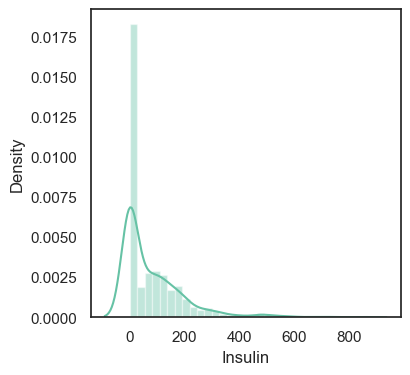

In [23]:
plt.figure(figsize=(4,4))
sns.distplot(diabetes_with_preprocessing['Insulin'])
print("Skew", diabetes_with_preprocessing['Insulin'].skew())
print("Kurtosis",diabetes_with_preprocessing['Insulin'].kurtosis())

In [24]:
diabetes_with_preprocessing['Insulin'] = np.where(diabetes_with_preprocessing['Insulin'] == 0, 0.000001, diabetes_with_preprocessing['Insulin'])
col_need_data_transformation = ['Insulin']
for col in col_need_data_transformation:
    diabetes_with_preprocessing[col] =  np.log(diabetes_with_preprocessing[col])

Skew -0.0435910628843419
Kurtosis -1.9918957573554472


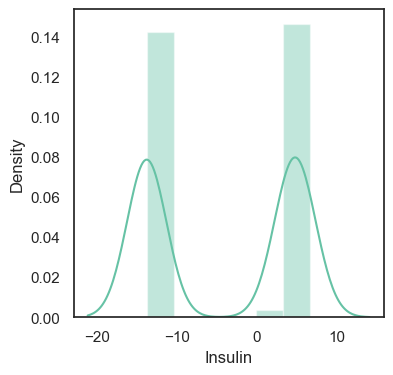

In [25]:
## after log transformation Insuling
#print(diabetes_with_preprocessing['Insulin'])
plt.figure(figsize=(4,4))
sns.distplot(diabetes_with_preprocessing['Insulin'])
print("Skew", diabetes_with_preprocessing['Insulin'].skew())
print("Kurtosis",diabetes_with_preprocessing['Insulin'].kurtosis())

In [26]:
# Scaling those columns which have values greater than 1
scaleIt = MinMaxScaler()
columns_to_be_scaled = [c for c in diabetes.columns if diabetes[c].max() > 1]
print("The columns which are to be scaled are :",columns_to_be_scaled)

scaled_columns = scaleIt.fit_transform(diabetes_with_preprocessing[columns_to_be_scaled])
scaled_columns = pd.DataFrame(scaled_columns, columns=columns_to_be_scaled)
scaled_columns['Outcome'] = diabetes['Outcome'] 
#copying the scaled DataFrame to original DataFrame

diabetes_with_preprocessing=scaled_columns
diabetes_with_preprocessing

The columns which are to be scaled are : ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetespedigreeFunction', 'Age']


Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.352941  0.743719       0.590164       0.353535  0.000000  0.500745   
1       0.058824  0.427136       0.540984       0.292929  0.000000  0.396423   
2       0.470588  0.919598       0.524590       0.000000  0.000000  0.347243   
3       0.058824  0.447236       0.540984       0.232323  0.893110  0.418778   
4       0.000000  0.688442       0.327869       0.353535  0.921359  0.642325   
..           ...       ...            ...            ...       ...       ...   
763     0.588235  0.507538       0.622951       0.484848  0.924715  0.490313   
764     0.117647  0.613065       0.573770       0.272727  0.000000  0.548435   
765     0.294118  0.608040       0.590164       0.232323  0.901634  0.390462   
766     0.058824  0.633166       0.491803       0.000000  0.000000  0.448584   
767     0.058824  0.467337       0.573770       0.313131  0.000000  0.453055   

     DiabetespedigreeFunction       Age  Outcome  
0                    0.234415  0.483333        1  
1                    0.116567  0.166667        0  
2                    0.253629  0.183333        1  
3                    0.038002  0.000000        0  
4                    0.943638  0.200000        1  
..                        ...       ...      ...  
763                  0.039710  0.700000        0  
764                  0.111870  0.100000        0  
765                  0.071307  0.150000        0  
766                  0.115713  0.433333        1  
767                  0.101196  0.033333        0  

[768 rows x 9 columns]

In [27]:
diabetes_with_preprocessing.shape

(768, 9)

In [28]:
diabetes_with_preprocessing[diabetes_with_preprocessing.duplicated()].shape
diabetes_with_preprocessing = diabetes_with_preprocessing[~diabetes_with_preprocessing.duplicated()]
diabetes_with_preprocessing.shape

(768, 9)

In [29]:
def thresholdsforOutliers(column_name):
    q1=diabetes_with_preprocessing[column_name].quantile(q=0.25)
    q3=diabetes_with_preprocessing[column_name].quantile(q=0.75)
    IQR=q3-q1
    upper=q3+(1.5*IQR)
    lower=q1-(1.5*IQR)
    return ({"upper":upper,"lower":lower})


In [30]:
diabetes_with_preprocessing.shape

(768, 9)

In [31]:
diabetes_with_preprocessing_rem= diabetes_with_preprocessing

In [32]:
for col in diabetes_with_preprocessing_rem.select_dtypes(include=np.number):
    print(col)
    count1 = diabetes_with_preprocessing_rem[diabetes_with_preprocessing_rem[col] == 0][col].count()
    print(count1)
    # if theer is no col with zero value 
    if(count1 != 0):
        thresholds=thresholdsforOutliers(col)
        col_upper=thresholds["upper"]
        col_lower=thresholds["lower"]

        percentage_removed=len(diabetes_with_preprocessing_rem[diabetes_with_preprocessing_rem[col]>col_upper])/len(diabetes_with_preprocessing_rem)*100
        print(round(percentage_removed,2), "% data has ",col," greater than the upper threshold", col_upper)
        percentage_removed_lower=len(diabetes_with_preprocessing_rem[diabetes_with_preprocessing_rem[col]<col_lower])/len(diabetes_with_preprocessing_rem)*100
        print(round(percentage_removed_lower,2), "% data has ",col," lesser than the lower threshold", col_lower)
        if(col!='Pregnancies'):
            diabetes_with_preprocessing_rem=diabetes_with_preprocessing_rem[( diabetes_with_preprocessing[col] > col_lower) & (diabetes_with_preprocessing[col] < col_upper)]
        print("Shape after removing",diabetes_with_preprocessing_rem.shape)

SyntaxError: expected ':' (2334539391.py, line 15)

In [ ]:
diabetes_with_preprocessing = diabetes_with_preprocessing_rem

In [ ]:
diabetes_with_preprocessing.shape

In [ ]:
diabetes_with_reduced = diabetes_with_preprocessing

In [ ]:
#BloodPressure
#SkinThickness
diabetes_with_reduced = diabetes_with_reduced.drop("BloodPressure", axis='columns')
diabetes_with_reduced = diabetes_with_reduced.drop("SkinThickness", axis='columns')

**5.2 Dividing The Data Into X And Y**

In [ ]:
x=diabetes.iloc[:,:-1]
y=diabetes.iloc[:,-1:]
x.head(5),y.head(5)

In [ ]:
x_with_preprocessing=diabetes_with_preprocessing.iloc[:,:-1]
y_with_preprocessing=diabetes_with_preprocessing.iloc[:,-1:]
x_with_preprocessing.head(5),y_with_preprocessing.head(5)

In [ ]:
x_with_red=diabetes_with_reduced.iloc[:,:-1]
y_with_red=diabetes_with_reduced.iloc[:,-1:]
x_with_red.head(5),y_with_red.head(5)

**5.3 Train Test Split**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [ ]:
print("Percentage of Positive Values in training data before Smote :",y_train.value_counts(normalize=True)[1]/(y_train.value_counts(normalize=True)[0]+y_train.value_counts(normalize=True)[1])*100,"%")
print("Percentage of Negative Values in training data before Smote :",y_train.value_counts(normalize=True)[0]/(y_train.value_counts(normalize=True)[0]+y_train.value_counts(normalize=True)[1])*100,"%")

print()
print('Shape of x before applying SMOTE :', x_train.shape)


smote = SMOTE()
x_train,y_train = smote.fit_resample(x_train,y_train)

print('Shape of x after applying SMOTE : ', x_train.shape)
print()

print("Percentage of Positive Values in training data after Smote :",y_train.value_counts(normalize=True)[1]/(y_train.value_counts(normalize=True)[0]+y_train.value_counts(normalize=True)[1])*100,"%")
print("Percentage of Negative Values in training data after Smote :",y_train.value_counts(normalize=True)[0]/(y_train.value_counts(normalize=True)[0]+y_train.value_counts(normalize=True)[1])*100,"%")


In [ ]:
x_train_with_pre, x_test_with_pre, y_train_with_pre, y_test_with_pre = train_test_split(x_with_preprocessing,y_with_preprocessing , test_size = 0.2, random_state = 42)

In [ ]:
x_train_with_red, x_test_with_red, y_train_with_red, y_test_with_red = train_test_split(x_with_red,y_with_red , test_size = 0.2, random_state = 42)

**5.4 Using SMOTE To Handle Class Imbalance**


In [ ]:
print("Percentage of Positive Values in training data before Smote :",y_train_with_pre.value_counts(normalize=True)[1]/(y_train.value_counts(normalize=True)[0]+y_train_with_pre.value_counts(normalize=True)[1])*100,"%")
print("Percentage of Negative Values in training data before Smote :",y_train_with_pre.value_counts(normalize=True)[0]/(y_train.value_counts(normalize=True)[0]+y_train_with_pre.value_counts(normalize=True)[1])*100,"%")

print()
print('Shape of x before applying SMOTE :', x_train_with_pre.shape)


smote = SMOTE()
x_train_with_pre,y_train_with_pre = smote.fit_resample(x_train_with_pre,y_train_with_pre)

print('Shape of x after applying SMOTE : ', x_train_with_pre.shape)
print()

print("Percentage of Positive Values in training data after Smote :",y_train_with_pre.value_counts(normalize=True)[1]/(y_train_with_pre.value_counts(normalize=True)[0]+y_train_with_pre.value_counts(normalize=True)[1])*100,"%")
print("Percentage of Negative Values in training data after Smote :",y_train_with_pre.value_counts(normalize=True)[0]/(y_train_with_pre.value_counts(normalize=True)[0]+y_train_with_pre.value_counts(normalize=True)[1])*100,"%")


In [ ]:
print("Percentage of Positive Values in training data before Smote :",x_train_with_red.value_counts(normalize=True)[1]/(y_train_with_red.value_counts(normalize=True)[0]+y_train_with_red.value_counts(normalize=True)[1])*100,"%")
print("Percentage of Negative Values in training data before Smote :",y_train_with_red.value_counts(normalize=True)[0]/(y_train_with_red.value_counts(normalize=True)[0]+y_train_with_red.value_counts(normalize=True)[1])*100,"%")

print()
print('Shape of x before applying SMOTE :', x_train_with_red.shape)


smote = SMOTE()
x_train_with_red,y_train_with_red = smote.fit_resample(x_train_with_red,y_train_with_red)

print('Shape of x after applying SMOTE : ', x_train_with_red.shape)
print()

print("Percentage of Positive Values in training data after Smote :",y_train_with_red.value_counts(normalize=True)[1]/(y_train_with_red.value_counts(normalize=True)[0]+y_train_with_red.value_counts(normalize=True)[1])*100,"%")
print("Percentage of Negative Values in training data after Smote :",y_train_with_red.value_counts(normalize=True)[0]/(y_train_with_red.value_counts(normalize=True)[0]+y_train_with_red.value_counts(normalize=True)[1])*100,"%")


In [ ]:
accuracy_metrics = []
precision_metrics =[]
recall_metrics = []
roc_auc_metrics= []

#  <p style="color:Blue;">6. Building The Models</p>

**6.1 Logistic Regression**

**6.1.1 Logistic Regression without preprocessing**

In [ ]:
model = LogisticRegression()
model.fit(x_train, y_train)
predicted=model.predict(x_test)
conf = confusion_matrix(y_test, predicted)
print ("Confusion Matrix : \n", conf)
print()
print ("The accuracy of Logistic Regression is : ", accuracy_score(y_test, predicted)*100, "%")
accuracy_metrics.append(str(round(accuracy_score(y_test, predicted)*100,2)) + "%")
print("Precision score for Logistic Regression is :",precision_score(y_test, predicted,)*100, "%")
precision_metrics.append(str(round(precision_score(y_test, predicted,)*100,2)) + "%")
print()
print("Recall score for Logistic Regression is :",recall_score(y_test, predicted,)*100, "%")
recall_metrics.append(str(round(recall_score(y_test, predicted,)*100,2)) + "%")
#print(accuracy_metrics)

In [ ]:
predictions = model.predict(x_test)
predictions_prob = model.predict_proba(x_test)[:, 1]
f1 = f1_score(y_test, predictions)
fpr, tpr, thresholds = roc_curve(y_test, predictions_prob)
plt.figure(figsize=(7,4))
roc_auc = roc_auc_score(y_test, predictions_prob)
# Plot ROC Curve
plt.subplot(122)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LG ROC Curve without pre-processing')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()
roc_auc_metrics.append(roc_auc)

**6.1.2 Logistic Regression with preprocessing**

In [ ]:
model_with_pre = LogisticRegression()
model_with_pre.fit(x_train_with_pre, y_train_with_pre)
predicted=model_with_pre.predict(x_test_with_pre)
conf_with_pre = confusion_matrix(y_test_with_pre, predicted)
print ("Confusion Matrix : \n", conf_with_pre)
print ("The accuracy of Logistic Regression is : ", accuracy_score(y_test_with_pre, predicted)*100, "%")
print("Precision score for Logistic Regression is :",precision_score(y_test_with_pre, predicted,)*100, "%")
print("Recall score for Logistic Regression is :",recall_score(y_test_with_pre, predicted,)*100, "%")
accuracy_metrics.append(str(round(accuracy_score(y_test_with_pre, predicted)*100,2)) + "%")
precision_metrics.append(str(round(precision_score(y_test_with_pre, predicted,)*100,2)) + "%")
recall_metrics.append(str(round(recall_score(y_test_with_pre, predicted,)*100,2)) + "%")

In [ ]:
predictions_prob = model_with_pre.predict_proba(x_test_with_pre)[:, 1]
f1 = f1_score(y_test_with_pre, predicted)
fpr, tpr, thresholds = roc_curve(y_test_with_pre, predictions_prob)
plt.figure(figsize=(7,4))
roc_auc = roc_auc_score(y_test_with_pre, predictions_prob)
# Plot ROC Curve
plt.subplot(122)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LG ROC Curve with pre-processing')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()
roc_auc_metrics.append(roc_auc)

In [ ]:
model_with_red = LogisticRegression()
model_with_red.fit(x_train_with_red, y_train_with_red)
predicted=model_with_red.predict(x_test_with_red)
conf_with_red = confusion_matrix(y_test_with_red, predicted)
print ("Confusion Matrix : \n", conf_with_red)
print ("The accuracy of Logistic Regression is : ", accuracy_score(y_test_with_red, predicted)*100, "%")
print("Precision score for Logistic Regression is :",precision_score(y_test_with_red, predicted,)*100, "%")
print("Recall score for Logistic Regression is :",recall_score(y_test_with_red, predicted,)*100, "%")
#accuracy_metrics.append(str(round(accuracy_score(y_test_with_red, predicted)*100,2)) + "%")
#precision_metrics.append(str(round(precision_score(y_test_with_red, predicted,)*100,2)) + "%")
#recall_metrics.append(str(round(recall_score(y_test_with_red, predicted,)*100,2)) + "%")

In [ ]:
predictions_prob = model_with_red.predict_proba(x_test_with_red)[:, 1]
f1 = f1_score(y_test_with_red, predicted)
fpr, tpr, thresholds = roc_curve(y_test_with_red, predictions_prob)
plt.figure(figsize=(7,4))
roc_auc = roc_auc_score(y_test_with_red, predictions_prob)
# Plot ROC Curve
plt.subplot(122)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LG ROC Curve with pre-processing')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()
#roc_auc_metrics.append(roc_auc)

**6.2 Gaussian Naive Bayes**


**6.2.1 Gaussian Naive Bayes without preprocessing**


In [ ]:
model = GaussianNB()
model.fit(x_train, y_train)  
predicted = model.predict(x_test)  
conf = confusion_matrix(y_test, predicted)
print ("Confusion Matrix : \n", conf)
print ("The accuracy of Gaussian Naive Bayes is : ", accuracy_score(y_test, predicted)*100, "%")
print("Precision score for Gaussian Naive Bayes is :",precision_score(y_test, predicted,)*100, "%")
print("Recall score for Gaussian Naive Bayes is :",recall_score(y_test, predicted,)*100, "%")
accuracy_metrics.append(str(round(accuracy_score(y_test, predicted)*100,2)) + "%")
precision_metrics.append(str(round(precision_score(y_test, predicted,)*100,2)) + "%")
recall_metrics.append(str(round(recall_score(y_test, predicted,)*100,2)) + "%")


In [ ]:
predictions_prob = model.predict_proba(x_test)[:, 1]
f1 = f1_score(y_test, predicted)
fpr, tpr, thresholds = roc_curve(y_test, predictions_prob)
plt.figure(figsize=(7,4))
roc_auc = roc_auc_score(y_test, predictions_prob)
# Plot ROC Curve
plt.subplot(122)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('GNB ROC Curve without preprocessing')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()
roc_auc_metrics.append(roc_auc)

**6.2.2 Gaussian Naive Bayes with preprocessing**


In [ ]:
model_with_pre = GaussianNB()
model_with_pre.fit(x_train_with_pre, y_train_with_pre)
  
predicted = model_with_pre.predict(x_test_with_pre)
  
conf_with_pre = confusion_matrix(y_test_with_pre, predicted)
print ("Confusion Matrix : \n", conf_with_pre)
print ("The accuracy of Gaussian Naive Bayes is : ", accuracy_score(y_test_with_pre, predicted)*100, "%")
print("Precision score for Gaussian Naive Bayes is :",precision_score(y_test_with_pre, predicted,)*100, "%")
print("Recall score for Gaussian Naive Bayes is :",recall_score(y_test_with_pre, predicted,)*100, "%")
accuracy_metrics.append(str(round(accuracy_score(y_test_with_pre, predicted)*100,2)) + "%")
precision_metrics.append(str(round(precision_score(y_test_with_pre, predicted,)*100,2)) + "%")
recall_metrics.append(str(round(recall_score(y_test_with_pre, predicted,)*100,2)) + "%")

In [ ]:
predictions_prob = model_with_pre.predict_proba(x_test_with_pre)[:, 1]
f1 = f1_score(y_test_with_pre, predicted)
fpr, tpr, thresholds = roc_curve(y_test_with_pre, predictions_prob)
plt.figure(figsize=(7,4))
roc_auc = roc_auc_score(y_test_with_pre, predictions_prob)
# Plot ROC Curve
plt.subplot(122)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('GNB ROC Curve with preprocessing')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()
roc_auc_metrics.append(roc_auc)

**6.3 Bernoulli Naive Bayes**


**6.3.1 Bernoulli Naive Bayes without preprocessing**


In [ ]:
model = BernoulliNB()
model.fit(x_train, y_train)  
predicted = model.predict(x_test)
conf = confusion_matrix(y_test, predicted)
print ("Confusion Matrix : \n", conf)
print()
print ("The accuracy of Bernoulli Naive Bayes is : ", accuracy_score(y_test, predicted)*100, "%")
print()
print("Precision score for Bernoulli Naive Bayes is :",precision_score(y_test, predicted,)*100, "%")
print()
print("Recall score for Bernoulli Naive Bayes is :",recall_score(y_test, predicted,)*100, "%")
accuracy_metrics.append(str(round(accuracy_score(y_test, predicted)*100,2)) + "%")
precision_metrics.append(str(round(precision_score(y_test, predicted,)*100,2)) + "%")
recall_metrics.append(str(round(recall_score(y_test, predicted,)*100,2)) + "%")

In [ ]:
predictions_prob = model.predict_proba(x_test)[:, 1]
f1 = f1_score(y_test, predicted)
fpr, tpr, thresholds = roc_curve(y_test, predictions_prob)
plt.figure(figsize=(7,4))
roc_auc = roc_auc_score(y_test, predictions_prob)
# Plot ROC Curve
plt.subplot(122)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('BNB ROC Curve without preprocessing')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()
roc_auc_metrics.append(roc_auc)

**6.3.2 Bernoulli Naive Bayes with preprocessing**


In [ ]:
model = BernoulliNB()
model.fit(x_train_with_pre, y_train_with_pre)
  
predicted = model.predict(x_test_with_pre)
conf = confusion_matrix(y_test_with_pre, predicted)
print ("Confusion Matrix : \n", conf)
print()
print ("The accuracy of Bernoulli Naive Bayes is : ", accuracy_score(y_test_with_pre, predicted)*100, "%")
print()
print("Precision score for Bernoulli Naive Bayes is :",precision_score(y_test_with_pre, predicted,)*100, "%")
print()
print("Recall score for Bernoulli Naive Bayes is :",recall_score(y_test_with_pre, predicted,)*100, "%")
accuracy_metrics.append(str(round(accuracy_score(y_test_with_pre, predicted)*100,2)) + "%")
precision_metrics.append(str(round(precision_score(y_test_with_pre, predicted,)*100,2)) + "%")
recall_metrics.append(str(round(recall_score(y_test_with_pre, predicted,)*100,2)) + "%")

In [ ]:
predictions_prob = model.predict_proba(x_test_with_pre)[:, 1]
f1 = f1_score(y_test_with_pre, predicted)
fpr, tpr, thresholds = roc_curve(y_test_with_pre, predictions_prob)
plt.figure(figsize=(7,4))
roc_auc = roc_auc_score(y_test_with_pre, predictions_prob)
# Plot ROC Curve
plt.subplot(122)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('BNB ROC Curve without preprocessing')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()
roc_auc_metrics.append(roc_auc)

**6.4 Support Vector Machine**


**6.4.1 Support Vector Machine without preprocessing**


In [ ]:
model = SVC()
model.fit(x_train, y_train)
predicted = model.predict(x_test)

conf = confusion_matrix(y_test, predicted)
print ("Confusion Matrix : \n", conf)
print ("The accuracy of SVM is : ", accuracy_score(y_test, predicted)*100, "%")
print("Precision score for SVM is :",precision_score(y_test, predicted,)*100, "%")
print("Recall score for SVM is :",recall_score(y_test, predicted,)*100, "%")
accuracy_metrics.append(str(round(accuracy_score(y_test, predicted)*100,2)) + "%")
precision_metrics.append(str(round(precision_score(y_test, predicted,)*100,2)) + "%")
recall_metrics.append(str(round(recall_score(y_test, predicted,)*100,2)) + "%")

In [ ]:
print("area under curve (auc): ", metrics.roc_auc_score(y_test, predicted))
roc_auc_metrics.append( metrics.roc_auc_score(y_test, predicted))


**6.4.2 Support Vector Machine with preprocessing**


In [ ]:
model = SVC()
model.fit(x_train_with_pre, y_train_with_pre)
predicted = model.predict(x_test_with_pre)

conf = confusion_matrix(y_test_with_pre, predicted)
print ("Confusion Matrix : \n", conf)
print()
print ("The accuracy of SVM is : ", accuracy_score(y_test_with_pre, predicted)*100, "%")
print()
print("Precision score for SVM is :",precision_score(y_test_with_pre, predicted,)*100, "%")
print()
print("Recall score for SVM is :",recall_score(y_test_with_pre, predicted,)*100, "%")
accuracy_metrics.append(str(round(accuracy_score(y_test_with_pre, predicted)*100,2)) + "%")
precision_metrics.append(str(round(precision_score(y_test_with_pre, predicted,)*100,2)) + "%")
recall_metrics.append(str(round(recall_score(y_test_with_pre, predicted,)*100,2)) + "%")

In [ ]:
print("area under curve (auc): ", metrics.roc_auc_score(y_test_with_pre, predicted))
roc_auc_metrics.append( metrics.roc_auc_score(y_test_with_pre, predicted))

**6.5 K Nearest Neighbours**

**6.5.1 K Nearest Neighbours without preprocessing**

In [ ]:
model = KNeighborsClassifier(n_neighbors = 1)  
model.fit(x_train, y_train)
predicted = model.predict(x_test)
conf = confusion_matrix(y_test, predicted)
print ("Confusion Matrix : \n", conf)

print()
print ("The accuracy of KNN is : ", accuracy_score(y_test, predicted)*100, "%")
print()
print("Precision score for KNN is :",precision_score(y_test, predicted,)*100, "%")
print()
print("Recall score for KNN is :",recall_score(y_test, predicted,)*100, "%")
accuracy_metrics.append(str(round(accuracy_score(y_test, predicted)*100,2)) + "%")
precision_metrics.append(str(round(precision_score(y_test, predicted,)*100,2)) + "%")
recall_metrics.append(str(round(recall_score(y_test, predicted,)*100,2)) + "%")

In [ ]:
predictions_prob = model.predict_proba(x_test)[:, 1]
f1 = f1_score(y_test, predicted)
fpr, tpr, thresholds = roc_curve(y_test, predictions_prob)
plt.figure(figsize=(7,4))
roc_auc = roc_auc_score(y_test, predictions_prob)
# Plot ROC Curve
plt.subplot(122)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC Curve without preprocessing')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()
roc_auc_metrics.append(roc_auc)

**6.5.2 K Nearest Neighbours with preprocessing**

In [ ]:
model_with_pre = KNeighborsClassifier(n_neighbors = 1)  
model_with_pre.fit(x_train_with_pre, y_train_with_pre)
predicted = model_with_pre.predict(x_test_with_pre)
conf = confusion_matrix(y_test_with_pre, predicted)
print ("Confusion Matrix : \n", conf)

print()
print ("The accuracy of KNN is : ", accuracy_score(y_test_with_pre, predicted)*100, "%")
print()
print("Precision score for KNN is :",precision_score(y_test_with_pre, predicted,)*100, "%")
print()
print("Recall score for KNN is :",recall_score(y_test_with_pre, predicted,)*100, "%")
accuracy_metrics.append(str(round(accuracy_score(y_test_with_pre, predicted)*100,2)) + "%")
precision_metrics.append(str(round(precision_score(y_test_with_pre, predicted,)*100,2)) + "%")
recall_metrics.append(str(round(recall_score(y_test_with_pre, predicted,)*100,2)) + "%")

In [ ]:
predictions_prob = model_with_pre.predict_proba(x_test_with_pre)[:, 1]
f1 = f1_score(y_test_with_pre, predicted)
fpr, tpr, thresholds = roc_curve(y_test_with_pre, predictions_prob)
plt.figure(figsize=(7,4))
roc_auc = roc_auc_score(y_test_with_pre, predictions_prob)
# Plot ROC Curve
plt.subplot(122)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC Curve with preprocessing')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()
roc_auc_metrics.append(roc_auc)

**6.6 X Gradient Boosting**

**6.6.1 X Gradient Boosting without preprocessing**

In [ ]:
model = xgb.XGBClassifier(use_label_encoder=False)
model.fit(x_train, y_train)
predicted = model.predict(x_test)

conf = confusion_matrix(y_test, predicted)
print ("Confusion Matrix : \n", conf)

print()
print ("The accuracy of XGBoost is : ", accuracy_score(y_test, predicted)*100, "%")
print()
print("Precision score for XGBoost is :",precision_score(y_test, predicted,)*100, "%")
print()
print("Recall score for XGBoost is :",recall_score(y_test, predicted,)*100, "%")
accuracy_metrics.append(str(round(accuracy_score(y_test, predicted)*100,2)) + "%")
precision_metrics.append(str(round(precision_score(y_test, predicted,)*100,2)) + "%")
recall_metrics.append(str(round(recall_score(y_test, predicted,)*100,2)) + "%")

In [ ]:
predictions_prob = model.predict_proba(x_test)[:, 1]
f1 = f1_score(y_test, predicted)
fpr, tpr, thresholds = roc_curve(y_test, predictions_prob)
plt.figure(figsize=(7,4))
roc_auc = roc_auc_score(y_test, predictions_prob)
# Plot ROC Curve
plt.subplot(122)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('GB ROC Curve without preprocessing')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()
roc_auc_metrics.append(roc_auc)

**6.6.1 X Gradient Boosting with preprocessing**

In [ ]:
model = xgb.XGBClassifier(use_label_encoder=False)
model.fit(x_train_with_pre, y_train_with_pre)
predicted = model.predict(x_test_with_pre)

conf = confusion_matrix(y_test_with_pre, predicted)
print ("Confusion Matrix : \n", conf)

print()
print ("The accuracy of XGBoost is : ", accuracy_score(y_test_with_pre, predicted)*100, "%")
print()
print("Precision score for XGBoost is :",precision_score(y_test_with_pre, predicted,)*100, "%")
print()
print("Recall score for XGBoost is :",recall_score(y_test_with_pre, predicted,)*100, "%")
accuracy_metrics.append(str(round(accuracy_score(y_test_with_pre, predicted)*100,2)) + "%")
precision_metrics.append(str(round(precision_score(y_test_with_pre, predicted,)*100,2)) + "%")
recall_metrics.append(str(round(recall_score(y_test_with_pre, predicted,)*100,2)) + "%")

In [ ]:
predictions_prob = model.predict_proba(x_test_with_pre)[:, 1]
f1 = f1_score(y_test_with_pre, predicted)
fpr, tpr, thresholds = roc_curve(y_test_with_pre, predictions_prob)
plt.figure(figsize=(7,4))
roc_auc = roc_auc_score(y_test_with_pre, predictions_prob)
# Plot ROC Curve
plt.subplot(122)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('GB ROC Curve without preprocessing')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()
roc_auc_metrics.append(roc_auc)

In [ ]:
print("area under curve (auc): ", metrics.roc_auc_score(y_test_with_pre, predicted))

In [ ]:
#Fitting The Random Forest Classifier model to the Traning Set
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators = 10,criterion = 'entropy',random_state = 0)
RF.fit(x_train, y_train)
RF_y_pred = RF.predict(x_test)
conf = confusion_matrix(y_test, RF_y_pred)
print ("Confusion Matrix : \n", conf)

print()
print ("The accuracy of RF is : ", accuracy_score(y_test, RF_y_pred)*100, "%")
print()
print("Precision score for RF is :",precision_score(y_test, RF_y_pred,)*100, "%")
print()
print("Recall score for RF is :",recall_score(y_test, RF_y_pred,)*100, "%")
accuracy_metrics.append(str(round(accuracy_score(y_test, RF_y_pred)*100,2)) + "%")
precision_metrics.append(str(round(precision_score(y_test, RF_y_pred,)*100,2)) + "%")
recall_metrics.append(str(round(recall_score(y_test, RF_y_pred,)*100,2)) + "%")

In [ ]:
predictions_prob = RF.predict_proba(x_test)[:, 1]
f1 = f1_score(y_test, RF_y_pred)
fpr, tpr, thresholds = roc_curve(y_test, predictions_prob)
plt.figure(figsize=(7,4))
roc_auc = roc_auc_score(y_test, predictions_prob)
# Plot ROC Curve
plt.subplot(122)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RF ROC Curve without preprocessing')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()
roc_auc_metrics.append(roc_auc)

In [ ]:
RF_with_pre = RandomForestClassifier(n_estimators = 10,criterion = 'entropy',random_state = 0)
RF_with_pre.fit(x_train_with_pre, y_train_with_pre)
RF_y_pred = RF_with_pre.predict(x_test_with_pre)
conf = confusion_matrix(y_test_with_pre, RF_y_pred)
print ("Confusion Matrix : \n", conf)

print()
print ("The accuracy of RF is : ", accuracy_score(y_test_with_pre, RF_y_pred)*100, "%")
print()
print("Precision score for RF is :",precision_score(y_test_with_pre, RF_y_pred,)*100, "%")
print()
print("Recall score for RF is :",recall_score(y_test_with_pre, RF_y_pred,)*100, "%")
accuracy_metrics.append(str(round(accuracy_score(y_test_with_pre, predicted)*100,2)) + "%")
precision_metrics.append(str(round(precision_score(y_test_with_pre, predicted,)*100,2)) + "%")
recall_metrics.append(str(round(recall_score(y_test_with_pre, predicted,)*100,2)) + "%")

In [ ]:
predictions_prob = RF_with_pre.predict_proba(x_test_with_pre)[:, 1]
f1 = f1_score(y_test_with_pre, predicted)
fpr, tpr, thresholds = roc_curve(y_test_with_pre, predictions_prob)
plt.figure(figsize=(7,4))
roc_auc = roc_auc_score(y_test_with_pre, predictions_prob)
# Plot ROC Curve
plt.subplot(122)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RF ROC Curve with preprocessing')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()
roc_auc_metrics.append(roc_auc)

In [ ]:
#Fitting The Decision Tree Classifier model to the Traning Set
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(x_train,y_train)
DT_y_pred = DT.predict(x_test)
conf = confusion_matrix(y_test, DT_y_pred)
print ("Confusion Matrix : \n", conf)

print()
print ("The accuracy of DT is : ", accuracy_score(y_test, DT_y_pred)*100, "%")
print()
print("Precision score for DT is :",precision_score(y_test, DT_y_pred,)*100, "%")
print()
print("Recall score for DT is :",recall_score(y_test, DT_y_pred,)*100, "%")
accuracy_metrics.append(str(round(accuracy_score(y_test, DT_y_pred)*100,2)) + "%")
precision_metrics.append(str(round(precision_score(y_test, DT_y_pred)*100,2)) + "%")
recall_metrics.append(str(round(recall_score(y_test, DT_y_pred)*100,2)) + "%")

In [ ]:
predictions_prob = DT.predict_proba(x_test)[:, 1]
f1 = f1_score(y_test, DT_y_pred)
fpr, tpr, thresholds = roc_curve(y_test, predictions_prob)
plt.figure(figsize=(7,4))
roc_auc = roc_auc_score(y_test, predictions_prob)
# Plot ROC Curve
plt.subplot(122)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RF ROC Curve without preprocessing')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()
roc_auc_metrics.append(roc_auc)

In [ ]:
#Fitting The Decision Tree Classifier model to the Traning Set
from sklearn.tree import DecisionTreeClassifier
DT_with_pre = DecisionTreeClassifier()
DT_with_pre.fit(x_train_with_pre,y_train_with_pre)
DT_y_pred = DT_with_pre.predict(x_test_with_pre)
conf = confusion_matrix(y_test_with_pre, DT_y_pred)
print ("Confusion Matrix : \n", conf)

print()
print ("The accuracy of DT is : ", accuracy_score(y_test_with_pre, DT_y_pred)*100, "%")
print()
print("Precision score for DT is :",precision_score(y_test_with_pre, DT_y_pred,)*100, "%")
print()
print("Recall score for DT is :",recall_score(y_test_with_pre, DT_y_pred,)*100, "%")
accuracy_metrics.append(str(round(accuracy_score(y_test_with_pre, predicted)*100,2)) + "%")
precision_metrics.append(str(round(precision_score(y_test_with_pre, predicted)*100,2)) + "%")
recall_metrics.append(str(round(recall_score(y_test_with_pre, predicted,)*100,2)) + "%")

In [ ]:
predictions_prob = DT_with_pre.predict_proba(x_test_with_pre)[:, 1]
f1 = f1_score(y_test_with_pre, predicted)
fpr, tpr, thresholds = roc_curve(y_test_with_pre, predictions_prob)
plt.figure(figsize=(7,4))
roc_auc = roc_auc_score(y_test_with_pre, predictions_prob)
# Plot ROC Curve
plt.subplot(122)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RF ROC Curve with preprocessing')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()
roc_auc_metrics.append(roc_auc)

In [ ]:
sum_table = {'ML Algorithm': ['LR without PreProcessing','LR with PreProcessing','GNB without PreProcessing','GNB with PreProcessing',
                       'BNB without PreProcessing','BNB with PreProcessing','SVM without preprecessing','SVM with preprocessing',
                            'KNN without preproccessing','KNN with preprocessing','GB without preprocessing','GB with preprocessing',
                            'RF without preprocessing','RF with preprocessing','DT without preprocessing','DT with preprocessing'], 
        'Accuracy': accuracy_metrics
        }
accuracy_sum_metric = pd.DataFrame(sum_table ,columns = ['ML Algorithm', 'Accuracy'] )
pre_sum_metric = pd.Series(precision_metrics, name = 'Precision') 
recall_sum_metric = pd.Series(recall_metrics, name = 'Recall')
roc_sum_metric = pd.Series(roc_auc_metrics, name = 'ROC AUC Score')

final_metric = pd.concat([accuracy_sum_metric,pre_sum_metric, recall_sum_metric, roc_sum_metric], axis = 1)

final_metric

#  <p style="color:Blue;">7. Conclusion</p>
1. Comparisions made for 6 algorithms with preprocessing vs without preprocessing and found metrics were improving for with processing 
2. Gaussian Naive bayes is performing the best in context of precision and recall where it is identifying 115 cases correct among total 154 predictions